In [14]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

from PIL import Image

import requests

import torch

import matplotlib.pyplot as plt

#### Image classification for existing class

In [12]:
# Load the feature extractor for the vision transformer
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Load the pre-trained weights from vision transformer
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/Users/jenniferjordache/Developer/Hugging-Face-Projects/.venv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


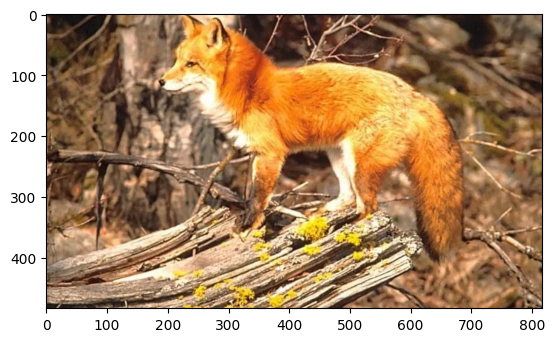

In [15]:
image = plt.imread('red_fox.jpg')

plt.imshow(image)

In [16]:
inputs = feature_extractor(images=image, return_tensors="pt") # extract features

In [17]:
print(inputs)

{'pixel_values': tensor([[[[-0.4745, -0.5922, -0.6863,  ..., -0.0588,  0.0431,  0.1059],
          [-0.3412, -0.5137, -0.6863,  ..., -0.0431,  0.0510,  0.0902],
          [-0.1529, -0.3961, -0.6471,  ..., -0.0196,  0.0510,  0.0588],
          ...,
          [-0.7412, -0.7490, -0.7176,  ..., -0.1373, -0.0902,  0.2078],
          [-0.7569, -0.7490, -0.7176,  ..., -0.2078, -0.3490, -0.2471],
          [-0.7569, -0.7569, -0.7176,  ..., -0.0745, -0.0745, -0.3412]],

         [[-0.6863, -0.8118, -0.8275,  ..., -0.2471, -0.1529, -0.0902],
          [-0.5451, -0.7176, -0.8196,  ..., -0.2314, -0.1451, -0.1059],
          [-0.3647, -0.5765, -0.7804,  ..., -0.2157, -0.1451, -0.1294],
          ...,
          [-0.8275, -0.8275, -0.8118,  ..., -0.3804, -0.2784,  0.0275],
          [-0.7882, -0.7804, -0.7725,  ..., -0.4118, -0.4902, -0.3725],
          [-0.7647, -0.7725, -0.7569,  ..., -0.2706, -0.2078, -0.4510]],

         [[-0.7020, -0.8275, -0.8275,  ..., -0.4275, -0.3176, -0.2549],
          [-0

In [18]:
pixel_values = inputs["pixel_values"]

outputs = model(pixel_values) # send pixel values of features to model to predict

In [19]:
logits = outputs.logits # get classes

logits.shape # number of classes


torch.Size([1, 1000])

In [20]:
predicted_class_idx = logits.argmax(-1).item() # find class index with highest probability

predicted_class_idx

277

In [22]:
predicted_class = model.config.id2label[predicted_class_idx] # get class name of index

predicted_class

'red fox, Vulpes vulpes'

#### Zero-shot image classification

In [23]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

checkpoint = "openai/clip-vit-large-patch14"

model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)

processor = AutoProcessor.from_pretrained(checkpoint)

config.json: 100%|██████████| 4.52k/4.52k [00:00<00:00, 1.53MB/s]
model.safetensors: 100%|██████████| 1.71G/1.71G [00:53<00:00, 31.9MB/s]
tokenizer_config.json: 100%|██████████| 905/905 [00:00<00:00, 4.92MB/s]
vocab.json: 100%|██████████| 961k/961k [00:00<00:00, 7.28MB/s]
merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 4.11MB/s]
tokenizer.json: 100%|██████████| 2.22M/2.22M [00:00<00:00, 13.4MB/s]
special_tokens_map.json: 100%|██████████| 389/389 [00:00<00:00, 1.27MB/s]


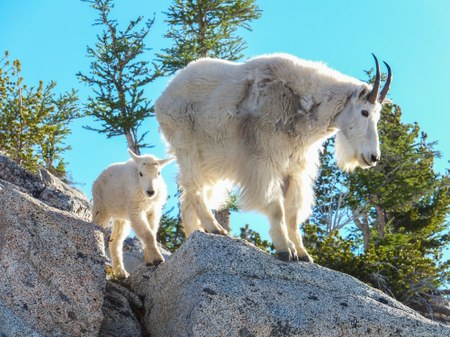

In [24]:
url = "https://www.mountaineers.org/blog/conservation-currents-a-new-home-for-our-goats-the-mountain-goat-translocation-plan/@@images/3836718d-f4f0-42af-a6f3-4521021a9504.jpeg"

image = Image.open(requests.get(url, stream=True).raw)

image

In [25]:
candidate_labels = ["tree", "rock", "goat", "cat"]

inputs = processor(images=image, text=candidate_labels, return_tensors="pt", padding=True)

In [26]:
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits_per_image[0]
probs = logits.softmax(dim=-1).numpy()

scores = probs.tolist()

result = [{"score": score, "label": candidate_label} for score, candidate_label in sorted(zip(probs, candidate_labels), key=lambda x: -x[0])]

result

[{'score': 0.72842836, 'label': 'goat'},
 {'score': 0.2645368, 'label': 'rock'},
 {'score': 0.0037683367, 'label': 'cat'},
 {'score': 0.0032664998, 'label': 'tree'}]

#### Zero-shot object detection

In [27]:
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

checkpoint = "google/owlvit-base-patch32"

model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)

processor = AutoProcessor.from_pretrained(checkpoint)

config.json: 100%|██████████| 4.42k/4.42k [00:00<00:00, 5.29MB/s]
model.safetensors: 100%|██████████| 613M/613M [00:20<00:00, 29.9MB/s] 
tokenizer_config.json: 100%|██████████| 775/775 [00:00<00:00, 2.29MB/s]
vocab.json: 100%|██████████| 1.06M/1.06M [00:00<00:00, 3.99MB/s]
merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 2.64MB/s]
special_tokens_map.json: 100%|██████████| 460/460 [00:00<00:00, 1.09MB/s]


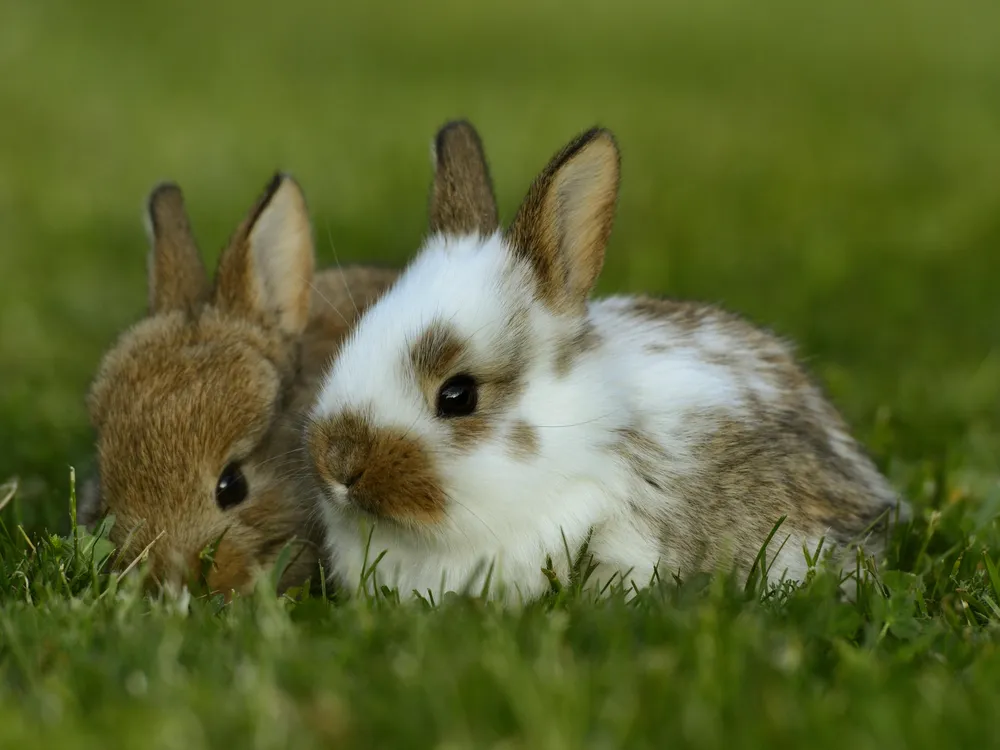

In [28]:
url = "https://th-thumbnailer.cdn-si-edu.com/I4LqhTPVPWGDEXHPQ4T92ZimR4c=/1000x750/filters:no_upscale()/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/70/e0/70e0989e-646e-4537-ae8e-7bbf863db2fd/ebjj1g.jpg"

image = Image.open(requests.get(url, stream=True).raw)

image

In [29]:
text_queries = ["hat", "book", "sunglasses", "rabbit"]

inputs = processor(text=text_queries, images=image, return_tensors="pt")

In [30]:
from PIL import ImageDraw

with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]

draw = ImageDraw.Draw(image)


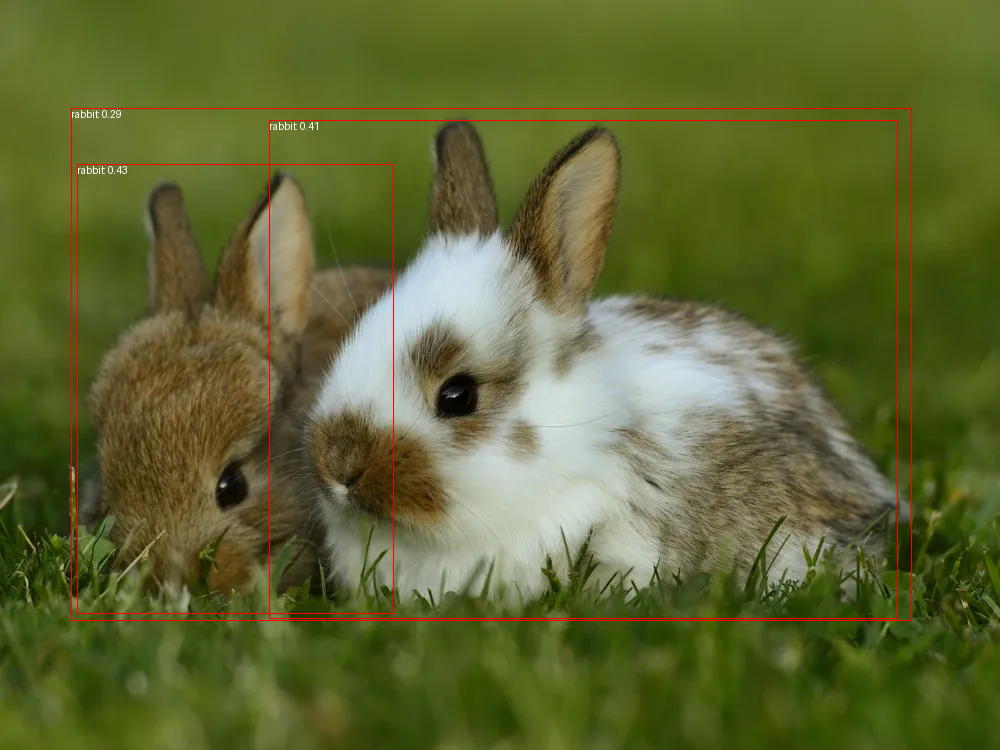

In [31]:
# Extract detection results (scores, labels, and bounding boxes)
scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

# Iterate over detected objects and draw bounding boxes and labels
for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}: {round(score,2)}", fill="white")

image